# Install Package

In [ ]:
!pip install catboost
!pip install shap
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 92 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 276 kB 5.2 MB/s 
     |████████████████████████████████| 9.8 MB 41.7 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


# Import Package

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, balanced_accuracy_score
from sklearn.metrics import classification_report
from feature_engine.encoding import OneHotEncoder
from feature_engine.encoding import OrdinalEncoder


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
import catboost as cb

import shap

# google drive auth
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

sns.set_style('darkgrid')
sns.set(font_scale=1.3)

In [ ]:
sns.set(rc={'figure.figsize': (20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

# Read Dataset

In [ ]:
# Load in the train and test datasets
train = pd.read_csv('/content/drive/MyDrive/Career/Portofolio/Loan Prediction/Training Data.csv')
test = pd.read_csv('/content/drive/MyDrive/Career/Portofolio/Loan Prediction/Test Data.csv')

train.sample(5)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
97648,97649,7884489,25,14,single,rented,no,Graphic_Designer,Dhule,Maharashtra,9,13,0
221443,221444,311944,37,15,single,rented,no,Drafter,Bhilwara,Rajasthan,4,13,1
180667,180668,6797003,73,19,single,rented,no,Financial_Analyst,Howrah,West_Bengal,6,12,0
152873,152874,415771,77,10,single,rented,no,Scientist,Muzaffarpur,Bihar,10,12,0
62425,62426,6671351,28,14,single,rented,no,Technology_specialist,Munger,Bihar,13,12,1


# Descriptive Statistics

In [ ]:
#informasi general dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


1. Tidak ada missing value
2. Tipe Data sudah sesuai

# Memisahkan Kolom Kategori dan Numerikal

In [ ]:
cats = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE']
nums = ['Id', 'Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']

# Cek Missing Value

In [ ]:
train.isna().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [ ]:
#double cek
train.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

# Cek Duplicate Data

In [ ]:
train.duplicated().sum()

0

# Statistika Summary

In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,252000.0,1.260005e+05,7.274628e+04,1.0,63000.75,126000.5,189000.25,252000.0
Income,252000.0,4.997117e+06,2.878311e+06,10310.0,2503015.00,5000694.5,7477502.00,9999938.0
Age,252000.0,4.995407e+01,1.706385e+01,21.0,35.00,50.0,65.00,79.0
Experience,252000.0,1.008444e+01,6.002590e+00,0.0,5.00,10.0,15.00,20.0
CURRENT_JOB_YRS,252000.0,6.333877e+00,3.647053e+00,0.0,3.00,6.0,9.00,14.0
CURRENT_HOUSE_YRS,252000.0,1.199779e+01,1.399037e+00,10.0,11.00,12.0,13.00,14.0
Risk_Flag,252000.0,1.230000e-01,3.284379e-01,0.0,0.00,0.0,0.00,1.0


1. Di kolom income terlihat adanya outlier yang sangat jauh
2. Kolom Risk_Flag bernilai boolean (target)

In [ ]:
# Summary Statistika Kategorikal
train[cats].describe()

,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE
count,252000,252000,252000,252000,252000,252000
unique,2,3,2,51,317,29
top,single,rented,no,Physician,Vijayanagaram,Uttar_Pradesh
freq,226272,231898,176000,5957,1259,28400


# Melihat Ketimpangan Data di Categoricals (Value Counting)

In [ ]:
for col in cats:
  print(f'''Value count kolom {col}:''')
  print(train[col].value_counts())
  print()

Value count kolom Married/Single:
single     226272
married     25728
Name: Married/Single, dtype: int64

Value count kolom House_Ownership:
rented          231898
owned            12918
norent_noown      7184
Name: House_Ownership, dtype: int64

Value count kolom Car_Ownership:
no     176000
yes     76000
Name: Car_Ownership, dtype: int64

Value count kolom Profession:
Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant              51

# Handle Unnecessary Value in 'CITY' column

In [ ]:
# before handling
# Ada karakter-karakter yang tidak diperlukan seperti [10] pada beberapa baris
train['CITY'].head(5).reset_index()

,index,CITY
0,0,Rewa
1,1,Parbhani
2,2,Alappuzha
3,3,Bhubaneswar
4,4,Tiruchirappalli[10]


In [ ]:
# after handling
train['CITY'] = train['CITY'].map(lambda x: x.split("[")[0] if "[" in x else x)
train['CITY'].head().reset_index()

,index,CITY
0,0,Rewa
1,1,Parbhani
2,2,Alappuzha
3,3,Bhubaneswar
4,4,Tiruchirappalli


In [ ]:
#dicek apakah sudah hilang
train['CITY'].value_counts()

Aurangabad       1543
Vijayanagaram    1259
Bhopal           1208
Bulandshahr      1185
Saharsa          1180
                 ... 
Ujjain            486
Warangal          459
Bettiah           457
Katni             448
Karaikudi         431
Name: CITY, Length: 316, dtype: int64

# Handle Unnecessary Value in 'STATE' column

In [ ]:
# before handling
# ada karakter yang tidak dibutuhkan seperti di index ke 26
train.groupby('STATE').agg({'Id' : 'nunique'}).reset_index()

,STATE,Id
0,Andhra_Pradesh,25297
1,Assam,7062
2,Bihar,19780
3,Chandigarh,656
4,Chhattisgarh,3834
5,Delhi,5490
6,Gujarat,11408
7,Haryana,7890
8,Himachal_Pradesh,833
9,Jammu_and_Kashmir,1780


In [ ]:
# after handling
train['STATE'] = train['STATE'].map(lambda x: x.split("[")[0] if "[" in x else x)
train['STATE'].reset_index()

,index,STATE
0,0,Madhya_Pradesh
1,1,Maharashtra
2,2,Kerala
3,3,Odisha
4,4,Tamil_Nadu
...,...,...
251995,251995,West_Bengal
251996,251996,Madhya_Pradesh
251997,251997,Maharashtra
251998,251998,Puducherry


In [ ]:
# dicek apakah sudah hilang
train.groupby('STATE').agg({'Id' : 'nunique'}).reset_index()

,STATE,Id
0,Andhra_Pradesh,25297
1,Assam,7062
2,Bihar,19780
3,Chandigarh,656
4,Chhattisgarh,3834
5,Delhi,5490
6,Gujarat,11408
7,Haryana,7890
8,Himachal_Pradesh,833
9,Jammu_and_Kashmir,1780


# Univariate Analysis

## Individual Boxplot (Numerical Features)

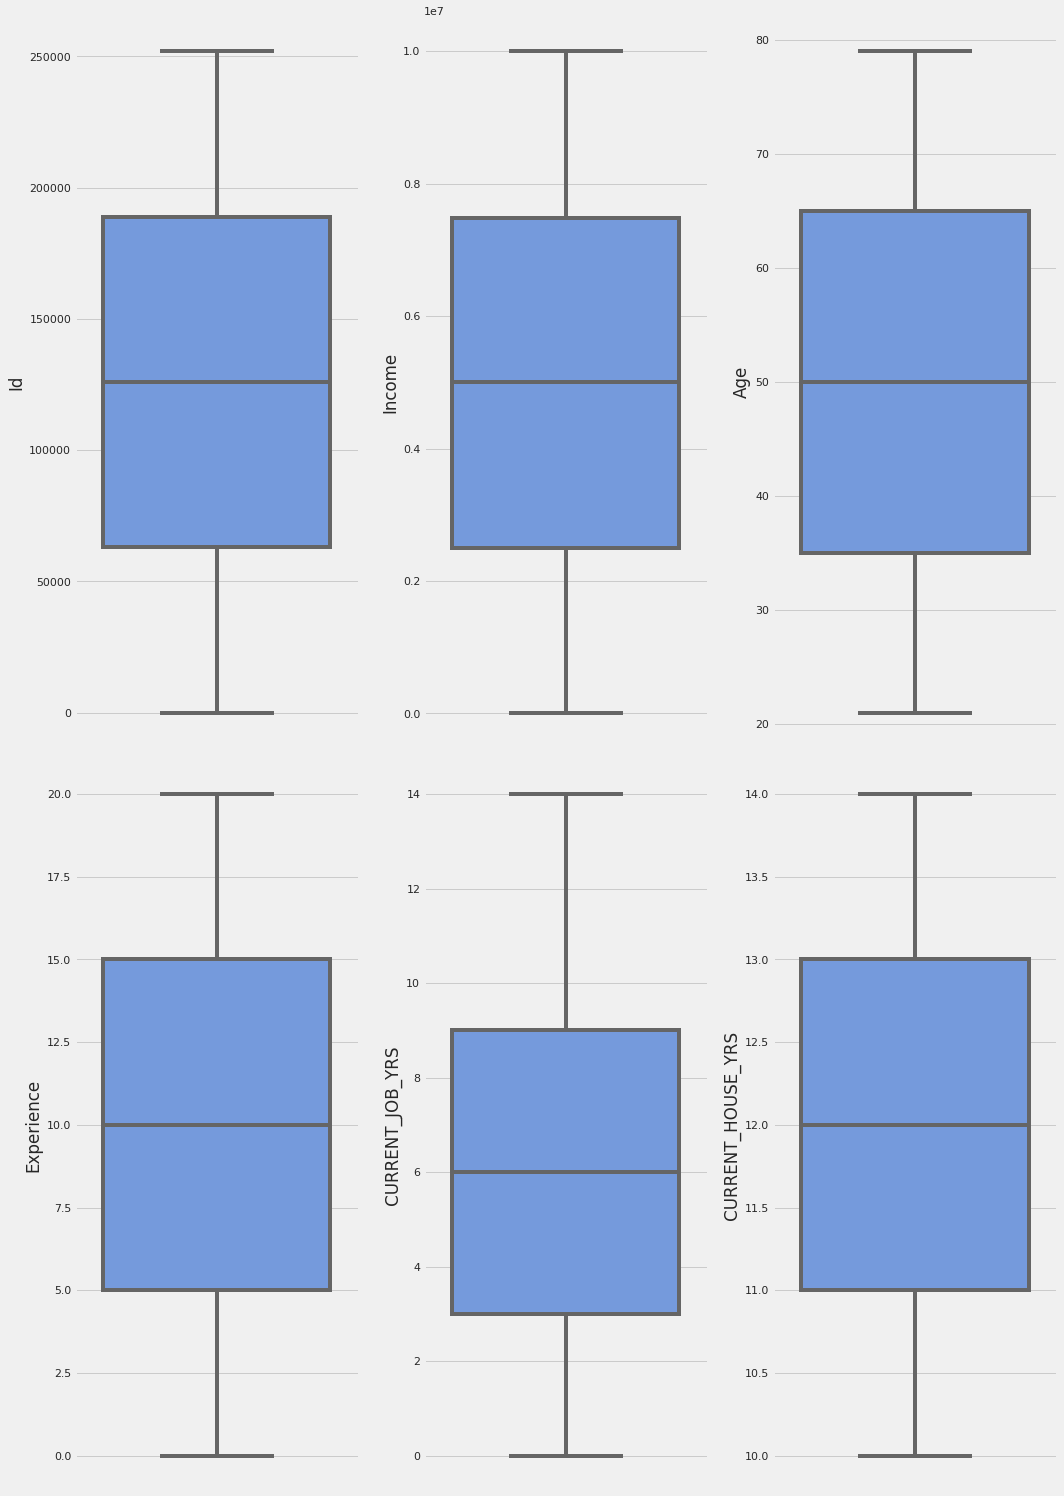

In [ ]:
features = nums
plt.figure(figsize=(15,21))
for i in range(0, len(features)):
  plt.subplot(2, 3, i+1)
  sns.boxplot(y=train[features[i]], color='cornflowerblue', orient='v')
  plt.tight_layout()

Dari visualisasi boxplot di atas, terlihat tidak adanya outlier.

## Individual Displot (Numerical)

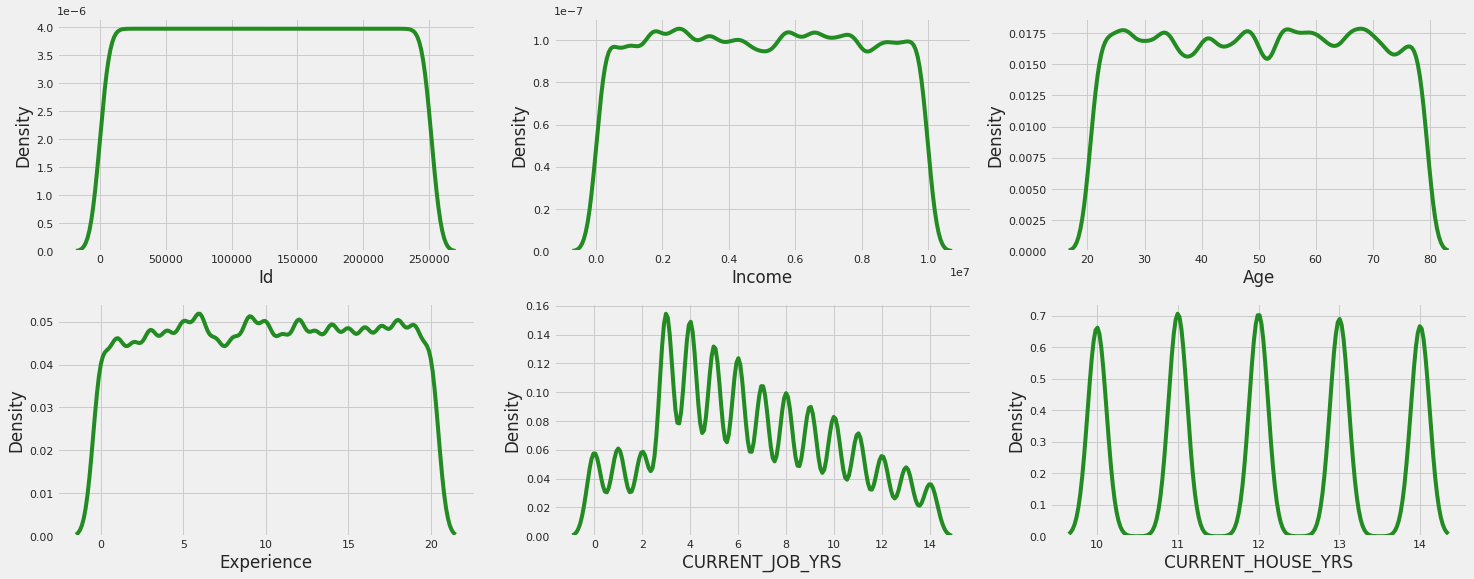

In [ ]:
features = nums
for i in range(0, len(features)):
  plt.subplot(2, 3, i+1)
  sns.kdeplot(x=train[features[i]], color='forestgreen')
  plt.xlabel(features[i])
  plt.tight_layout()

## Individual Countplot (kategorikal)

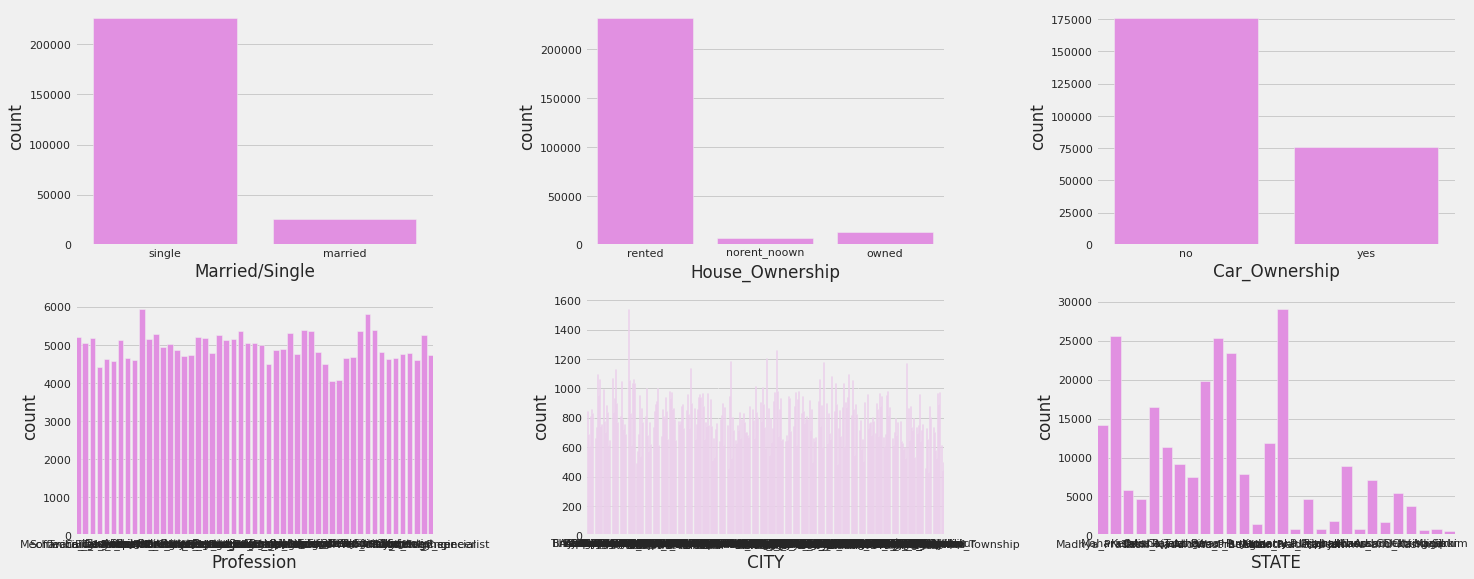

In [ ]:
features = cats
for i in range(0, len(features)):
  plt.subplot(2, 3, i+1)
  sns.countplot(x=train[features[i]], color = 'violet')
  plt.tight_layout()

Dari grafik individual countplot categorical di atas, dapat terlihat:
1. Customer yang berstatus single mendominan dibanding yang sudah married
2. Customer yang menyewa rumah jauh lebih dominan, lalu urutan kedua adalah customer yang memiliki rumah sendiri dan terakhir ada customer yang tidak punya rumah maupun tidak menyewa rumah
3. Customer yang tidak memiliki mobil juga lebih banyak dibandingkan yang memiliki mobil
4. Untuk kolom Profession, City, dan State, unique values nya terlalu banyak sehingga sulit untuk membacanya.

# Multivariate Analysis

## Correlation Heatmap (Numeric)

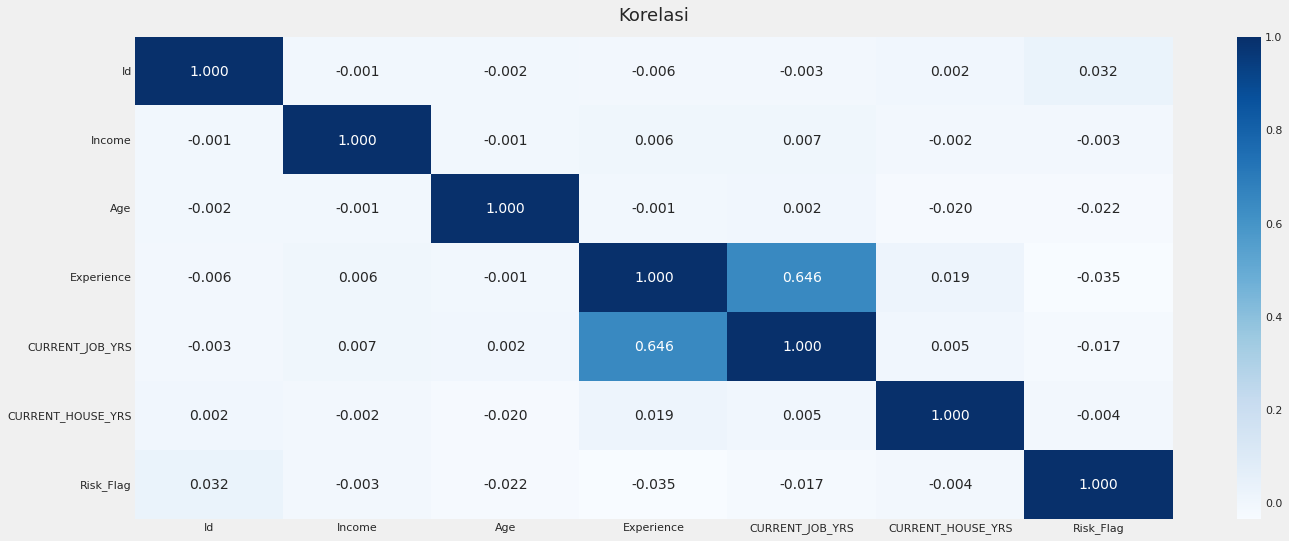

In [ ]:
# Correlation Analysis
#plt.figure(figsize=(16, 8))

# Create mask for diagonal correlation plot
mask = np.triu(np.ones_like(train.corr(), dtype=np.bool))

# Plot the heatmap
heatmap = sns.heatmap(train.corr(), cmap='Blues', annot=True, fmt='.3f')
heatmap.set_title('Korelasi', fontdict={'fontsize':18}, pad=16);

Dari visualisasi heatmap di atas, diketahui:
1. Target (Risk_Flag) berkorelasi cukup kuat, yang berarti penyewa baru berkemungkinan semakin beresiko.
2. Kolom income memiliki korelasi yang rendah, menandakan fitur tersebut tidak akan digunakan
3. Kolom Age, Experience, Current_job_years dan current_house_yrs memiliki korelasi yang kuat namun berkebalikan (negatif)
4. Untuk kolom experience dan current_job_yrs, hanya akan dipilih salah satu karena nilainya sama (redundant)

## Korelasi antar Target dan Fitur

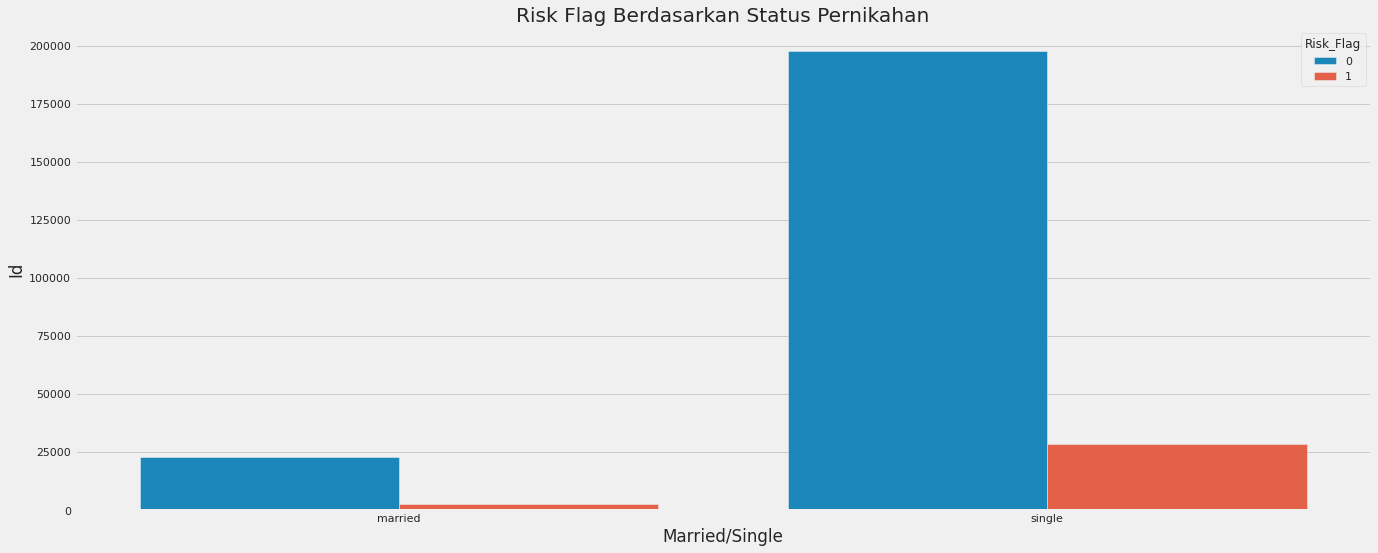

In [ ]:
df1 = train.groupby(['Married/Single', 'Risk_Flag']).agg({'Id' : 'nunique'}).reset_index()
sns.barplot(x='Married/Single', y='Id', hue='Risk_Flag', data=df1)
plt.title('Risk Flag Berdasarkan Status Pernikahan');

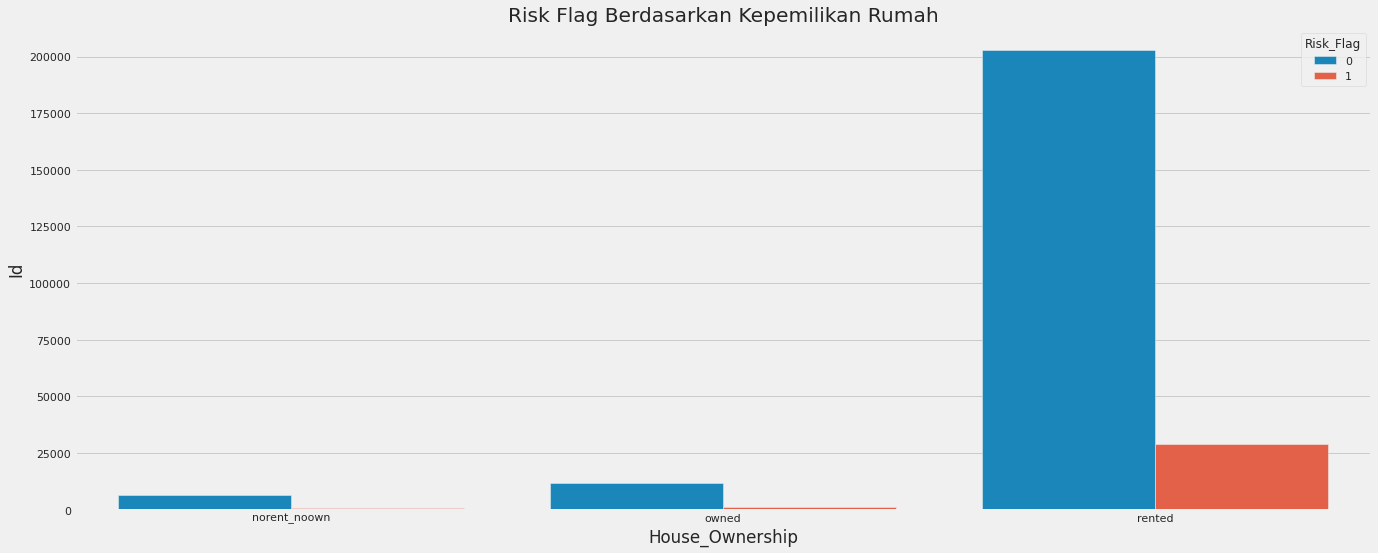

In [ ]:
df2 = train.groupby(['House_Ownership', 'Risk_Flag']).agg({'Id' : 'nunique'}).reset_index()
sns.barplot(x='House_Ownership', y='Id', hue='Risk_Flag', data=df2)
plt.title('Risk Flag Berdasarkan Kepemilikan Rumah');

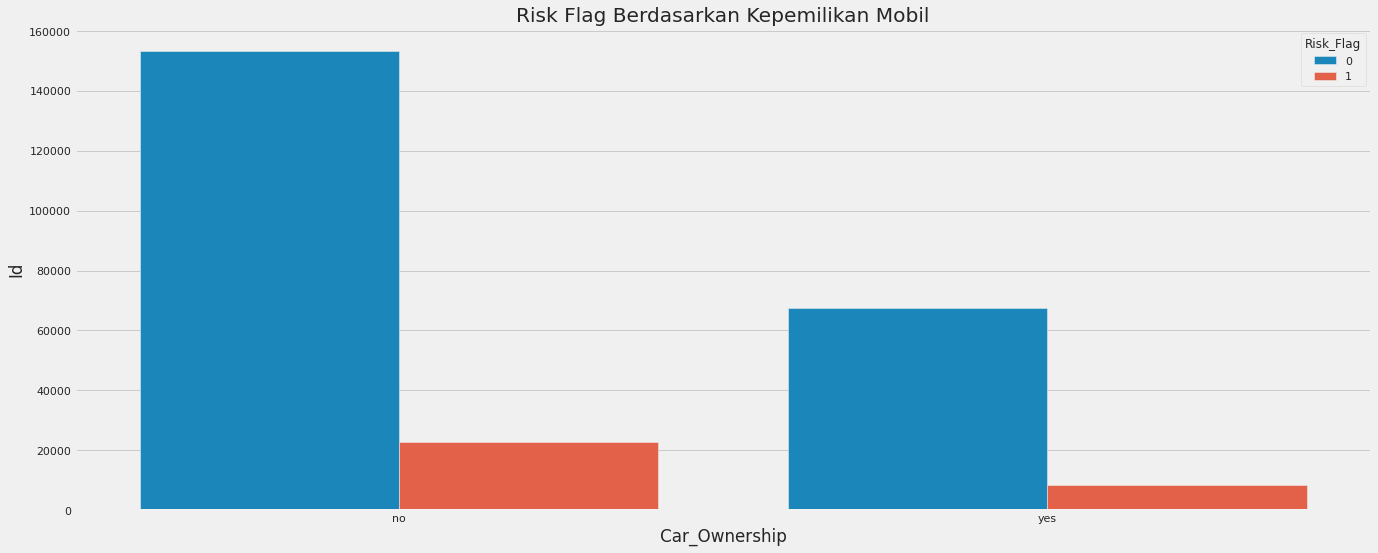

In [ ]:
df3 = train.groupby(['Car_Ownership', 'Risk_Flag']).agg({'Id' : 'nunique'}).reset_index()
sns.barplot(x='Car_Ownership', y='Id', hue='Risk_Flag', data=df3)
plt.title('Risk Flag Berdasarkan Kepemilikan Mobil');

Dari visualisasi di atas, disimpulkan:
1. Yang berstatus single mendominasi, sehingga target (risk_flag) juga didominasi oleh customer yang single
2. Customer yang menyewa rumah sangat banyak, jadi risk_flag pun didominasi oleh yang menyewa rumah
3. Sama dengan 2 kesimpulan lainnya, customer yang tidak memiliki mobil mendominasi. Sehingga risk_flag pun didominasi oleh customer yang tidak memiliki mobil.

# Business Insight

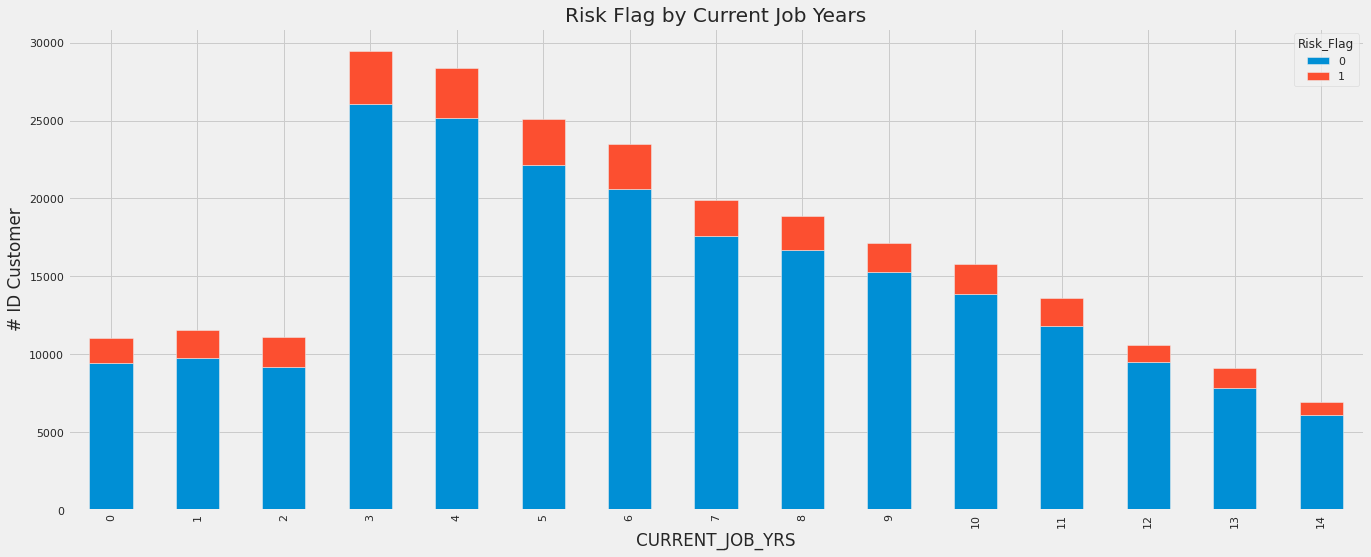

In [ ]:
JobXRiskFlag = pd.crosstab(train["CURRENT_JOB_YRS"], train["Risk_Flag"])
JobXRiskFlag.plot(kind = 'bar', stacked = 'true', title = "Risk Flag by Current Job Years")
plt.xlabel('CURRENT_JOB_YRS')
plt.ylabel('# ID Customer')
plt.show()

In [ ]:
train.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

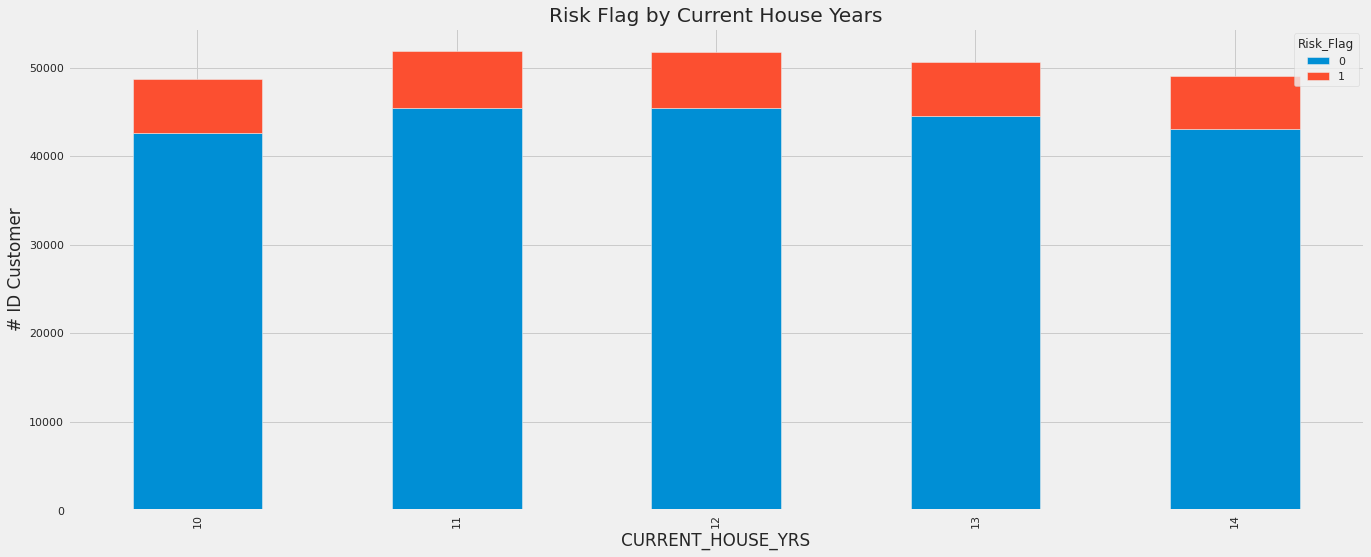

In [ ]:
HouseXRiskFlag = pd.crosstab(train["CURRENT_HOUSE_YRS"], train["Risk_Flag"])
HouseXRiskFlag.plot(kind = 'bar', stacked = 'true', title = "Risk Flag by Current House Years")
plt.xlabel('CURRENT_HOUSE_YRS')
plt.ylabel('# ID Customer')
plt.show()